## <center><a>Watsapp Data Analysis </a></center>

The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the chat.

## <a>Important Steps</a> 

1. set mobile time format to 24hrs
2. open watsapp select any contact
3. click on 3 dots then click on more
4. click on export chart -> without media 
5. copy .txt chat file and paste it in DATA folder

## <a>Functions</a> 


I imported all packages manually just to show you which are which and how they work. 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from utils.whatsapp import helper      # Helper to prepare the data
from utils.whatsapp import general     # General statistics
from utils.whatsapp import tf_idf      # To calculate TF-IDF
from utils.whatsapp import emoji       # To analyze emoji use
from utils.whatsapp import topic       # Topic modelling and summarization
from utils.whatsapp import sentiment   # Sentiment Analysis
from utils.whatsapp import wordcloud   # Create Word Clouds\

from utils.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rao_rakesh_new\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rao_rakesh_new\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a>General Statistics</a> 


Here you can find general data with regards to whatsapp conversations such as the number of messages and words. this is simply to get a general understanding of the conversations.

#### <a>Prepare Data</a> 


The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [11]:
df = helper.import_data('../data/WhatsApp Chat with Ruzaan.txt')

In [12]:
df.shape # total number of messeges is 1156

(1156, 3)

In [13]:
df.head(10)

,index,Message_Raw,User
0,0,"09/01/19, 11:53 - Messages and calls are end-t...",Messages and calls are end-to-end encrypted. N...
1,0,"09/01/19, 11:53 - Devdatta: https://youtu.be/8...",Devdatta
2,1,"25/01/19, 14:08 - Devdatta: <Media omitted>\n",Devdatta
3,2,"28/02/19, 13:32 - Devdatta: https://1337x.to/t...",Devdatta
4,3,"19/03/19, 18:38 - Devdatta: wait for 5 min\n",Devdatta
5,4,"19/03/19, 19:08 - Devdatta: laptop on hai\n",Devdatta
6,5,"19/03/19, 19:08 - Devdatta: ?\n",Devdatta
7,6,"19/03/19, 19:27 - Devdatta: done\n",Devdatta
8,7,"19/03/19, 19:27 - Devdatta: wo torrent file do...",Devdatta
9,8,"19/03/19, 19:27 - Devdatta: open kar\n",Devdatta


In [14]:
df.columns

Index(['index', 'Message_Raw', 'User'], dtype='object')

In [15]:
df = helper.preprocess_data(df)

In [16]:
df.head(10)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
203,202,"01/05/19, 14:21 - Devdatta: https://www.linked...",Devdatta,https://www.linkedin.com/in/devdatta-supnekar/,httpswwwlinkedincomindevdattasupnekar,2019-01-05 14:21:00,14,5
204,203,"01/05/19, 14:21 - Devdatta: take a look\n",Devdatta,take a look,take a look,2019-01-05 14:21:00,14,5
205,204,"01/05/19, 14:22 - Devdatta: or tera bhi bana a...",Devdatta,or tera bhi bana aise hi,or tera bhi bana aise hi,2019-01-05 14:22:00,14,5
794,159,"01/05/19, 14:50 - Ruzaan: Thanks\n",Ruzaan,Thanks,thanks,2019-01-05 14:50:00,14,5
795,160,"01/05/19, 14:50 - Ruzaan: Sure\n",Ruzaan,Sure,sure,2019-01-05 14:50:00,14,5
796,161,"01/05/19, 16:06 - Ruzaan: Nice profile bro\n",Ruzaan,Nice profile bro,nice profile bro,2019-01-05 16:06:00,16,5
73,72,"02/04/19, 23:41 - Devdatta: aaj ka r code send...",Devdatta,aaj ka r code send kar na,aaj ka r code send kar na,2019-02-04 23:41:00,23,0
72,71,"02/04/19, 23:41 - Devdatta: hey\n",Devdatta,hey,hey,2019-02-04 23:41:00,23,0
635,0,"28/02/19, 13:30 - Ruzaan: Brooo\n",Ruzaan,Brooo,brooo,2019-02-28 13:30:00,13,3
3,2,"28/02/19, 13:32 - Devdatta: https://1337x.to/t...",Devdatta,https://1337x.to/torrent/3127884/Udemy-Statist...,httpsxtotorrentudemystatisticsfordatasciencean...,2019-02-28 13:32:00,13,3


In [17]:
df.columns

Index(['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text',
       'Date', 'Hour', 'Day_of_Week'],
      dtype='object')

In [18]:
df["Message_Raw"][:30]

203    01/05/19, 14:21 - Devdatta: https://www.linked...
204            01/05/19, 14:21 - Devdatta: take a look\n
205    01/05/19, 14:22 - Devdatta: or tera bhi bana a...
794                   01/05/19, 14:50 - Ruzaan: Thanks\n
795                     01/05/19, 14:50 - Ruzaan: Sure\n
796         01/05/19, 16:06 - Ruzaan: Nice profile bro\n
73     02/04/19, 23:41 - Devdatta: aaj ka r code send...
72                     02/04/19, 23:41 - Devdatta: hey\n
635                    28/02/19, 13:30 - Ruzaan: Brooo\n
3      28/02/19, 13:32 - Devdatta: https://1337x.to/t...
699                      03/04/19, 00:10 - Ruzaan: Bro\n
698                03/04/19, 00:10 - Ruzaan: I will br\n
697     03/04/19, 00:10 - Ruzaan: As soon as I go home\n
74              03/04/19, 00:10 - Devdatta: got it bro\n
702            03/04/19, 00:55 - Ruzaan: Let me know 😛\n
701     03/04/19, 00:55 - Ruzaan: But if you need help\n
700    03/04/19, 00:55 - Ruzaan: If you need any help...
75                      03/04/1

In [19]:
df['Message_Clean'][:]

203        https://www.linkedin.com/in/devdatta-supnekar/
204                                           take a look
205                              or tera bhi bana aise hi
794                                                Thanks
795                                                  Sure
                              ...                        
618                                                    ok
633     May the auspicious festival of lights, beautif...
609                                                    😂😂
1150                                             Hahahaha
1151                                           Hahahahaha
Name: Message_Clean, Length: 1102, dtype: object

In [20]:
# Change labels for anonymization - Leave this at False
if True:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Dev', 'Ruzaan'])}
    df.User = df.User.map(user_labels)

#### <a> Users in the group</a> 


In [21]:
general.print_users(df)

#############
##  Users  ##
#############

Dev
Ruzaan


#### <a> Users in the group</a> 


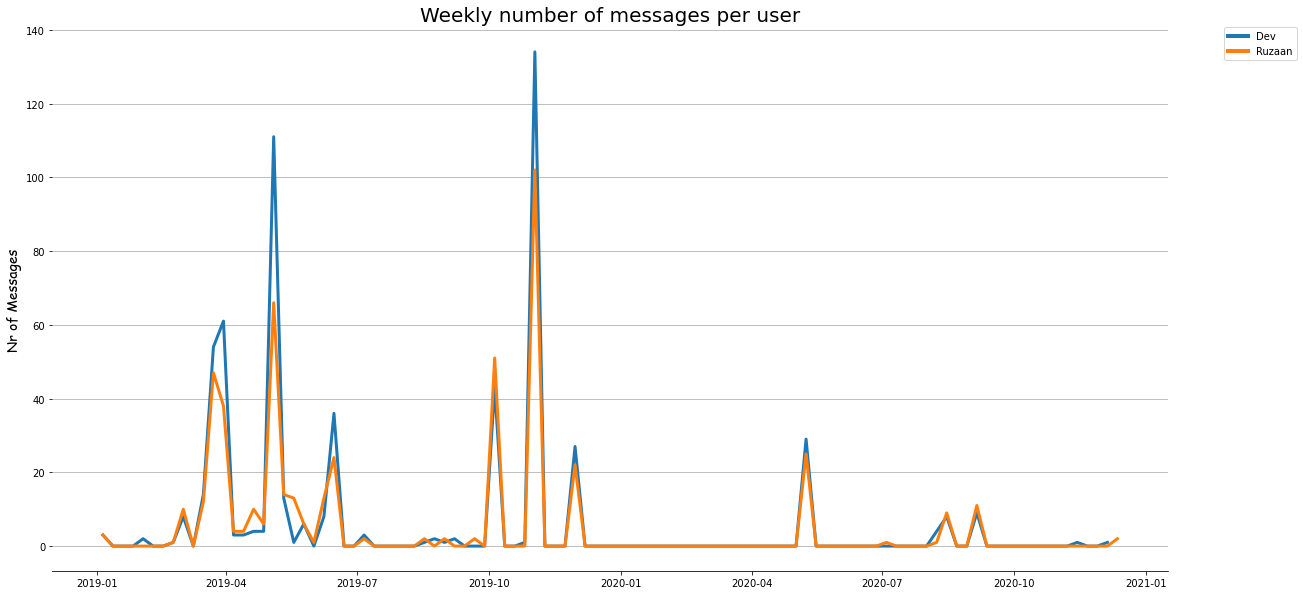

In [22]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a>Active Moments</a> 


**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

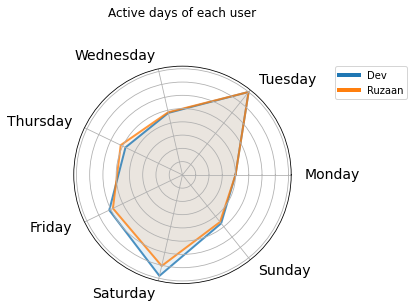

In [23]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

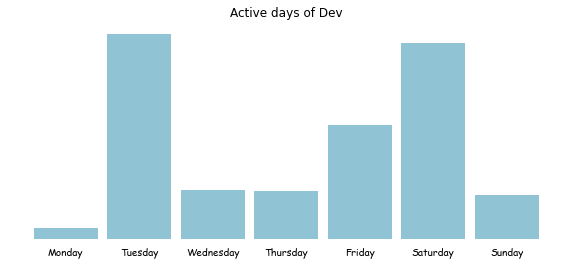

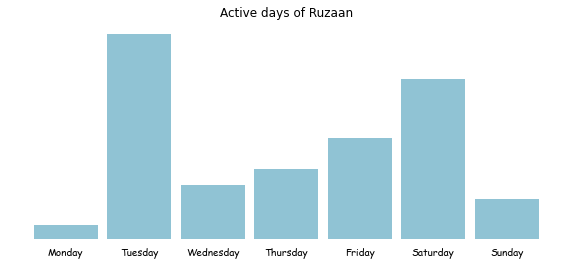

In [24]:
general.plot_active_days(df, savefig=False, dpi=100, user='Dev')
general.plot_active_days(df, savefig=False, dpi=100, user='Ruzaan')

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

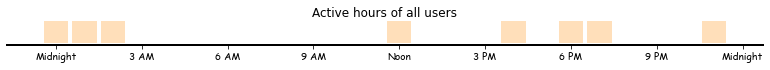

In [25]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

**Calendar Map**  
Here you can choose for which year you want to see the activity

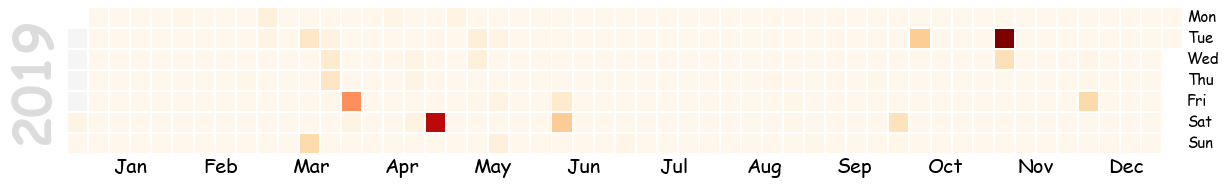

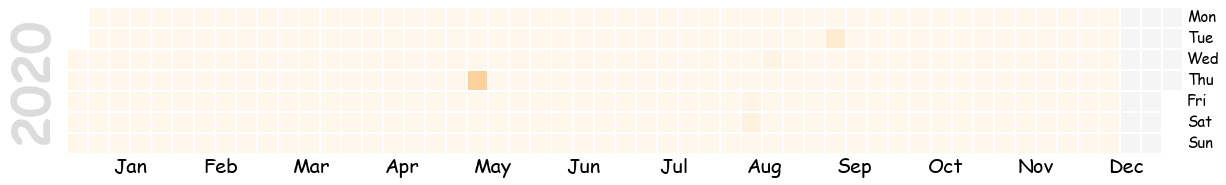

In [26]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#### <a>Averages / Summaries</a> 


Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [27]:
general.print_stats(df, love=False)

##########################
##  Number of Messages  ##
##########################

598	Dev
504	Ruzaan

#######################
##  Number of Words  ##
#######################

2442	Dev
1799	Ruzaan

#########################
##  Messages per hour  ##
#########################

Dev:	0.03557406305770375
Ruzaan:	0.0296680009418413

################################
##  Avg nr Words per Message  ##
################################

Dev: 4.08
Ruzaan: 3.57

#############################
##  Avg length of Message  ##
#############################

Dev: 19.25
Ruzaan: 16.17

##############################
##  Highscore Day per User  ##
##############################

Dev
Messages: 	117
Day: 		2019-11-05

Ruzaan
Messages: 	84
Day: 		2019-11-05



#### <a>Response Time</a> 


In [28]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Dev:                          15.26
Ruzaan:                       26.76

##############################
##  Nr. Initiated Messages  ##
##############################

Dev:                          14		(2.34% of all messages)
Ruzaan:                       14		(2.78% of all messages)


## <a >TF-IDF</a> 


#### <a>Create Count Vector</a> 


It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [29]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")

In [30]:
counts[:30]

,Word,Dev,Ruzaan
1,take,1,2
3,look,1,0
5,tera,4,1
6,bhi,26,2
7,bana,5,0
8,aise,1,0
9,hi,12,2
10,thanks,2,10
11,sure,0,9
12,nice,0,1


In [31]:
counts.loc[counts['Word']=="help"]

,Word,Dev,Ruzaan
42,help,0,3


In [32]:
counts.loc[counts['Word']=="thanks"]

,Word,Dev,Ruzaan
10,thanks,2,10


In [33]:
counts.loc[counts['Word']=="study"]

,Word,Dev,Ruzaan
131,study,3,5


In [34]:
counts.loc[counts['Word']=="bye"]

,Word,Dev,Ruzaan
1013,bye,0,1


In [35]:
counts.loc[counts['Word']=="job"]

,Word,Dev,Ruzaan
484,job,3,3


#### <a>Unique Words</a> 


In [36]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [37]:
unique_words

,Word,Dev,Ruzaan,Dev_TF_IDF,Ruzaan_TF_IDF,Dev_Unique,Ruzaan_Unique
1,take,1,2,11.815534,17.724739,0.666613,1.500122
3,look,1,0,14.013316,7.011915,1.998501,0.500375
5,tera,4,1,26.979956,10.796305,2.498999,0.400160
6,bhi,26,2,99.164154,11.021720,8.997158,0.111146
7,bana,5,0,32.375400,5.400861,5.994489,0.166820
...,...,...,...,...,...,...,...
1106,joy,1,0,14.013316,7.011915,1.998501,0.500375
1107,loved,1,0,14.013316,7.011915,1.998501,0.500375
1108,high,1,0,14.013316,7.011915,1.998501,0.500375
1109,spirits,1,0,14.013316,7.011915,1.998501,0.500375


#### <a>Plot Image</a> 


In [38]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Dev
Ruzaan


**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

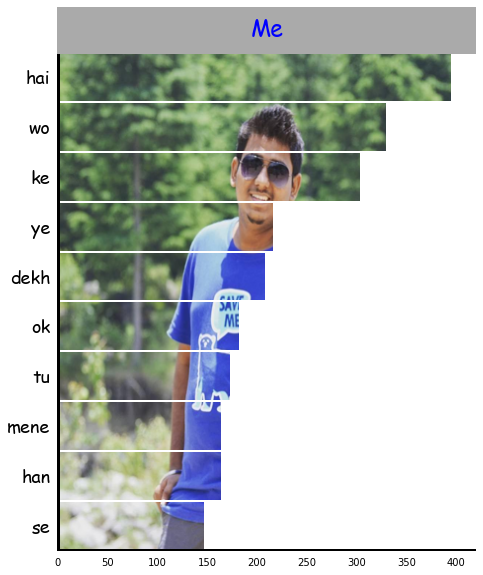

In [39]:
tf_idf.plot_unique_words(unique_words, 
                         user='Dev', 
                         image_path='../images/dev.jpeg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Me", 
                         title_color="Blue", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

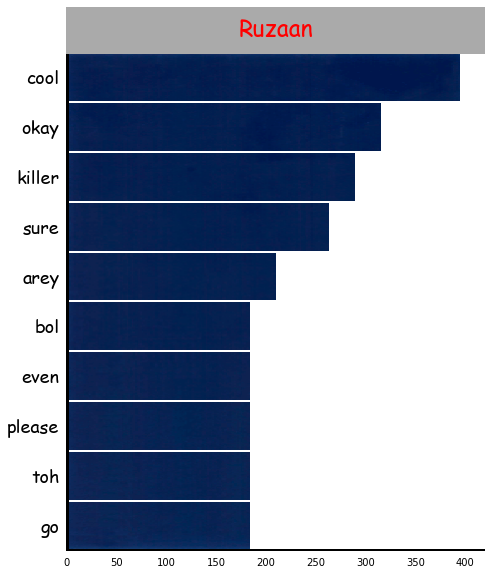

In [40]:
tf_idf.plot_unique_words(unique_words, 
                         user="Ruzaan", 
                         image_path='../images/mask.png', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Ruzaan", 
                         title_color="Red", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

# <a>Emoji Analysis</a> 

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

In [41]:

temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a>Unique and Common Emoji</a> 





In [42]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Dev
:/ 5.058430717863104
=P 2.5292153589315527
BP 1.686143572621035

Ruzaan
:) 2.372277227722773
BP 0.5930693069306932
=P 0.3953795379537953

#########################
### Most Common Emoji ###
#########################

Dev
:/ 11
=P 2
BP 1

Ruzaan
:) 1
:/ 1



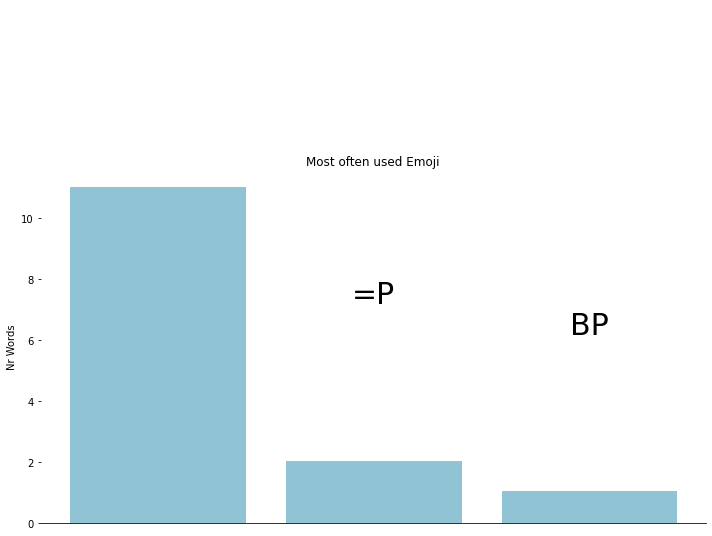

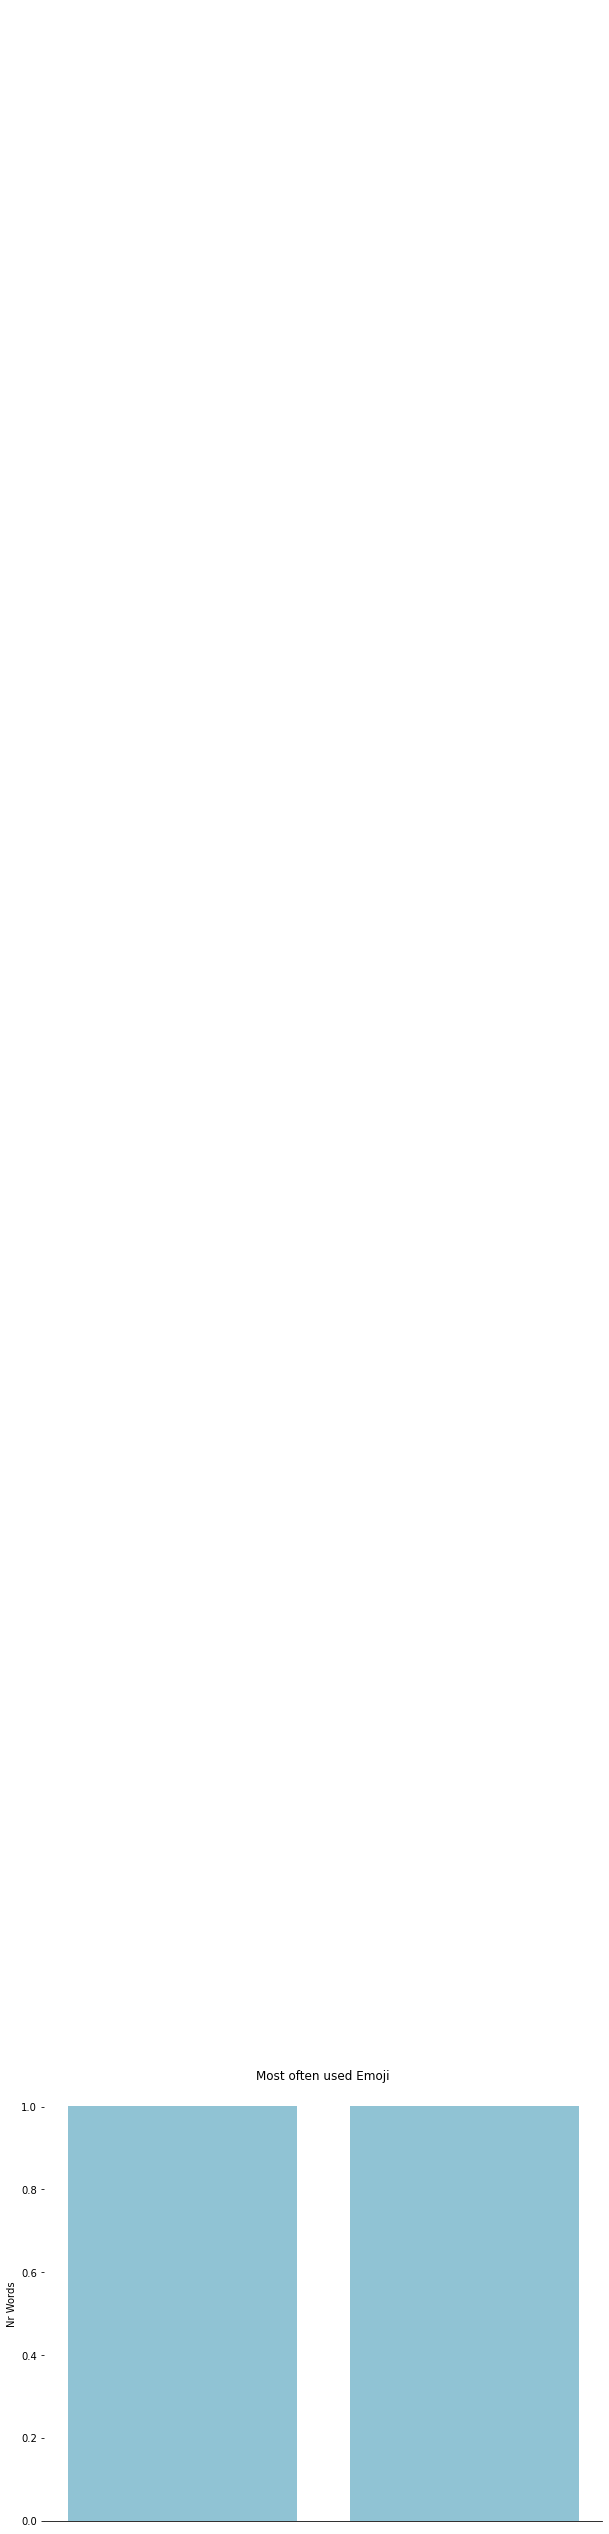

In [43]:
emoji.plot_counts(counts, user = "Dev")
emoji.plot_counts(counts, user = "Ruzaan")

#### <a>Correlation Matrix</a> 


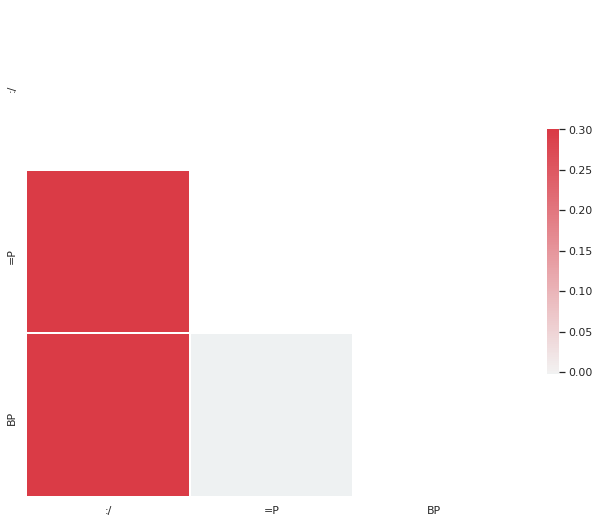

In [44]:
emoji.plot_corr_matrix(df, "Dev", list_of_words, counts)

# <a>Topic Modelling</a> 


In [45]:
df['Message_Only_Text'] # Use This column

203                 httpswwwlinkedincomindevdattasupnekar
204                                           take a look
205                              or tera bhi bana aise hi
794                                                thanks
795                                                  sure
                              ...                        
618                                                    ok
633     may the auspicious festival of lights beautifu...
609                                                      
1150                                             hahahaha
1151                                           hahahahaha
Name: Message_Only_Text, Length: 1102, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df['Message_Only_Text']) 

In [47]:
dtm   # so we have 1102 documents and 398 features

<1102x398 sparse matrix of type '<class 'numpy.float64'>'
	with 2251 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=7, random_state=42) # nmf is faster than lda 
nmf_model.fit(dtm) 

NMF(n_components=7, random_state=42)

In [49]:
nmf_model.components_

array([[1.64462292e-03, 0.00000000e+00, 1.37792200e-04, ...,
        0.00000000e+00, 0.00000000e+00, 6.24925770e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.06378566e+00, 0.00000000e+00, 0.00000000e+00],
       [1.81827258e-02, 0.00000000e+00, 6.61369937e-02, ...,
        0.00000000e+00, 0.00000000e+00, 3.56212456e-03],
       ...,
       [0.00000000e+00, 5.76678646e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.04210194e-02, 1.95085018e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.45186262e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.26372820e-05]])

In [50]:
for i, topic in enumerate(nmf_model.components_):
    print("THE TOP 15 WORDS FOR TOPIC # {}".format(i))
    print([tfidf.get_feature_names()[index]  for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0
['thank', 'profile', 'hours', 'der', 'video', 'got', 'free', 'send', 'did', 'code', 'thanks', 'bol', 'good', 'hey', 'bro']




THE TOP 15 WORDS FOR TOPIC # 1
['lena', 'start', 'theory', 'day', 'try', 'jaldi', 'let', 'bro', 'agree', 'know', 'google', 'updated', 'issues', 'bol', 'yes']




THE TOP 15 WORDS FOR TOPIC # 2
['sab', 'kuch', 'hota', 'code', 'tu', 'kia', 'course', 'abhi', 'ka', 'ye', 'bhi', 'nahi', 'wo', 'wala', 'hai']




THE TOP 15 WORDS FOR TOPIC # 3
['aaunga', 'mujhe', 'marks', 'interview', 'hogaya', 'oura', 'lena', 'kabhi', 'days', 'yep', 'wo', 'bhi', 'phir', 'np', 'ok']




THE TOP 15 WORDS FOR TOPIC # 4
['oura', 'udemy', 'doing', 'ish', 'nlp', 'ke', 'raha', 'bolta', 'aaunga', 'dw', 'yahi', 'wala', 'free', 'wo', 'han']




THE TOP 15 WORDS FOR TOPIC # 5
['karta', 'complete', 'diya', 'le', 'nahi', 'free', 'abhi', 'sirf', 'bhi', 'ke', 'raha', 'wo', 'dekh', 'hu', 'kar']




THE TOP 15 WORDS FOR TOPIC # 6
['ish', 'nahi', 'explain', 'kuch', 'samj

In [51]:
from utils.whatsapp import topic
df['Message_Prepared'] = df['Message_Only_Text']

#### <a>LDA</a> 
There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF.

In [52]:
topic.topics(df, model='lda', language="english")

###########
### Dev ###
###########


Topics in lda model:
Topic #0: ok hey free bad bro good ke
Topic #1: kar yes bro raha hu se teko
Topic #2: wo kar dekh na meko ke tha
Topic #3: hai nahi ke abhi bhi ye ek
Topic #4: hu han karta ki aya mail sab

##############
### Ruzaan ###
##############


Topics in lda model:
Topic #0: thanks home try please linked going want
Topic #1: okay good hu man kar upload noise
Topic #2: bro yes ha course download go tomorrow
Topic #3: killer sure bol arey lol study got
Topic #4: cool free let know send ask fuck



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [53]:
topic.topics(df, model='nmf', language="english")

###########
### Dev ###
###########


Topics in nmf model:
Topic #0: ok np phir bhi wo yess hogaya
Topic #1: hai wala ye ka wo bhi abhi
Topic #2: han yahi dw wo aaunga wala bolta
Topic #3: hey bro ana yes der good got
Topic #4: kar wo hu dekh bhi raha nahi

##############
### Ruzaan ###
##############


Topics in nmf model:
Topic #0: bro bol good thanks code go send
Topic #1: cool ask speak hahahaha issues ish hu
Topic #2: yes also know bro help itna issues
Topic #3: okay sure free issues ish hu hours
Topic #4: killer youtube jaldi issues ish hu hours



## <a>Sentiment</a> 


#### <a>Prepare Data</a> 

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

#### <a>Average Sentiment Per User</a> 


Prints the average sentiment per user to get an indication of positivity of that user. 


In [56]:
# !pip install pattern

In [57]:
from pattern.nl import sentiment  as sentiment_nl
df['Sentiment'] = df.apply(lambda row: sentiment_nl(row.Message_Clean)[0], 1)

ModuleNotFoundError: No module named 'pattern'

In [50]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Dev:                          		0.028
Ruzaan:                       		0.098





#### <a>Plot Sentiment</a> 


The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

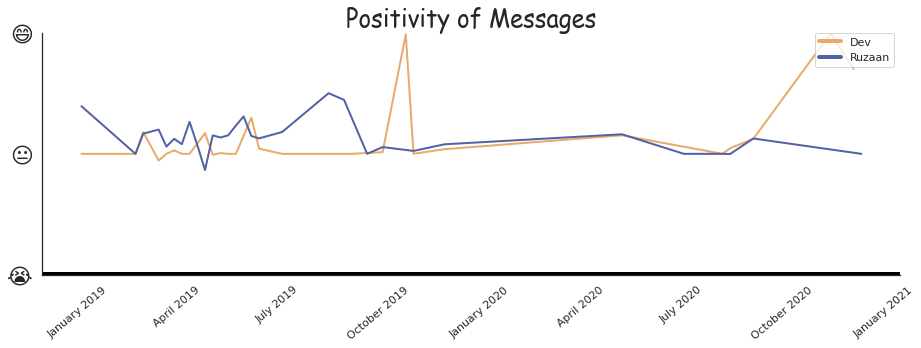

In [58]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

# <a>Word Clouds</a> 


#### <a>Prepare Data</a> 


In [59]:
user = "Dev"
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="dutch", column="Word")
words = counts[["Word", user]].set_index('Word').to_dict()[user]

#### <a> Masked Word Cloud</a> 


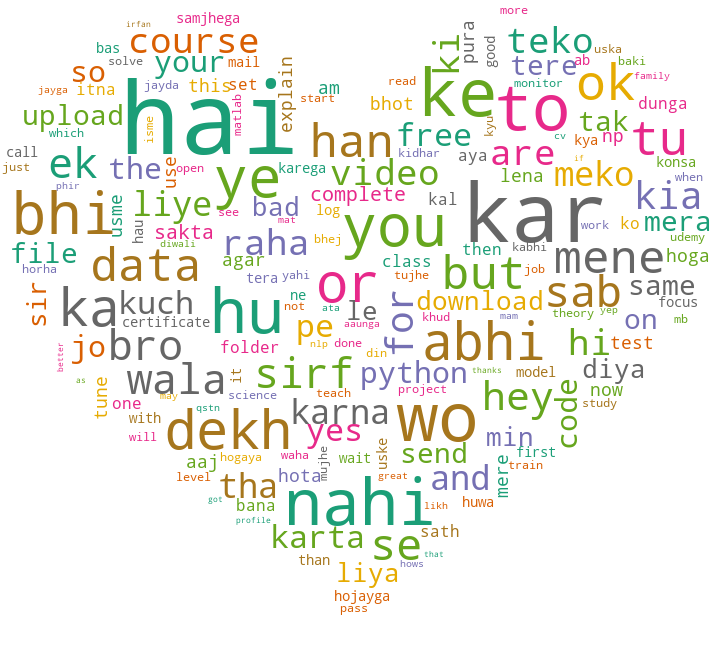

In [60]:
wordcloud.create_wordcloud(words,random_state=42, mask="../images/heart.jpg",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

## <a>Sentiment-based Word Cloud</a> 



In [61]:
# Choose which user you want to see the word cloud for
positive, negative = wordcloud.extract_sentiment_count(counts, user = "Her")

KeyError: "['Her'] not in index"

##### <a> Positive Words </a>

In [ ]:
wordcloud.create_wordcloud(data=positive, cmap='Greens', mask='mask.png', 
                    stopwords='stopwords.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.3)

##### <a>Negative Words</a>

In [ ]:
wordcloud.create_wordcloud(data=negative, cmap='Reds', mask='mask.png', 
                    stopwords='stopwords.txt', random_state=42, max_words=10000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.3)

# <a>Picture Analysis</a> 

#### <a>Extract Frequent Colors (k-Means)</a> 


In [ ]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [ ]:
extract_colors = False

if extract_colors:
    # Get Top 5 Frequent Colors
    path = 'Images/'
    all_colors = [colors.get_common_colors(path + i) for i in os.listdir(path)]

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

#### <a>Plot Frequent Colors</a> 


After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

In [ ]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

In [ ]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)

In [ ]:
!pip install pattern